# code to test multifiles support

In [1]:
from nbimports import *

In [2]:
filename = "../data/user/data_17052022_162236.csv"
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']
df1 = utils.format_from_df(data)

In [3]:
filename = "../data/user/data_17052022_162714.csv"
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']
df2 = utils.format_from_df(data)

In [4]:
df1['card_id'] = str(0)
df2['card_id'] = str(1)
df = pd.concat([df1, df2])

In [8]:
c0_si = select(df, card_id='0')['segment_id']
c1_si = select(df, card_id='1')['segment_id']

In [10]:
c0_si = np.random.choice(c0_si, 10, replace=False)
c1_si = np.random.choice(c1_si, 10, replace=False)

In [11]:
arr1 = np.r_[np.zeros(10), np.ones(10)]
arr2 = np.r_[c0_si, c1_si]
arr = np.stack([arr1, arr2]).T

In [122]:
np.random.shuffle(arr)

In [16]:
df

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,s,angle,card_id
0,30566_0,30566,0.000000,0,1,0,0.506802,0.729462,0.016136,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.963595,0
1,30579_10,30579,0.000089,10,1,0,0.506802,0.729462,0.015874,0.000000,0.000000,-0.000262,0.000000e+00,0.000000e+00,-8.930183e-08,0.000000,0.000000,0.000000,0.963595,0
2,30592_20,30592,0.000178,20,1,0,0.505870,0.730103,0.016622,-0.000932,0.000641,0.000485,-3.172973e-07,2.182401e-07,-6.902527e-07,0.000000,0.000000,0.000000,0.965959,0
3,30605_30,30605,0.000266,30,1,0,0.504170,0.731140,0.017976,-0.002632,0.001678,0.001840,-3.935770e-06,2.662198e-06,-1.687061e-06,0.000000,0.000000,0.000000,0.969690,0
4,30618_40,30618,0.000355,40,1,0,0.501865,0.732309,0.019471,-0.004937,0.002848,0.003335,-2.411044e-05,1.596699e-05,3.011082e-06,0.000000,0.000000,0.000000,0.973621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15212,198486_1600,198486,0.999819,1600,53,347,0.385742,0.798050,0.018835,-0.235883,0.045761,0.008210,-2.015458e-01,6.894510e-02,1.012913e-02,-0.004926,-0.002186,0.538983,1.122464,1
15213,198486_1610,198486,0.999819,1610,53,347,0.382787,0.795163,0.017912,-0.238838,0.042875,0.007287,-2.060848e-01,6.657862e-02,1.032182e-02,-0.004699,-0.002196,0.518715,1.122464,1
15214,198498_1620,198498,0.999883,1620,53,347,0.372704,0.784475,0.013106,-0.248921,0.032186,0.002481,-2.109297e-01,6.379334e-02,1.041242e-02,-0.004634,-0.002340,0.519135,1.129722,1
15215,198520_1630,198520,1.000000,1630,53,347,0.367958,0.779419,0.010795,-0.253666,0.027130,0.000170,-2.163027e-01,6.039882e-02,1.030932e-02,-0.004794,-0.002656,0.548068,1.129722,1


In [24]:
res = pd.DataFrame()
for row in arr:
    selected = select(df, card_id=str(int(row[0])), segment_id=int(row[1]))
    print(row, selected.shape[0])
    res = pd.concat([res, selected])

[  0. 151.] 122
[ 0. 88.] 81
[ 0. 93.] 133
[  0. 107.] 100
[  0. 196.] 66
[  0. 141.] 29
[  0. 227.] 124
[  0. 222.] 125
[  0. 190.] 57
[ 0. 37.] 125
[  1. 305.] 139
[ 1. 23.] 46
[ 1. 57.] 26
[  1. 139.] 87
[  1. 185.] 22
[ 1. 29.] 40
[ 1. 69.] 31
[  1. 317.] 62
[1. 7.] 84
[ 1. 46.] 33


In [25]:
for i, grp in res.groupby(['card_id', 'segment_id']):
    print(i)

('0', 37)
('0', 88)
('0', 93)
('0', 107)
('0', 141)
('0', 151)
('0', 190)
('0', 196)
('0', 222)
('0', 227)
('1', 7)
('1', 23)
('1', 29)
('1', 46)
('1', 57)
('1', 69)
('1', 139)
('1', 185)
('1', 305)
('1', 317)


In [126]:
res.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,x0,y0,p0,x1,y1,p1,s,angle,da,card_id
11646,3943194_54850,3943194,0.871403,54850,90,174,0.492202,0.606036,0.045519,0.119155,...,0.178381,0.136374,0.018514,-0.009404,0.001260,-0.000310,0.948795,-204.336764,0.199208,1
11647,3943207_54860,3943207,0.871477,54860,90,174,0.485677,0.596525,0.047893,0.112630,...,0.167894,0.132801,0.018417,-0.009869,-0.000664,-0.000271,0.989164,-204.136379,0.207561,1
11648,3943207_54870,3943207,0.871477,54870,90,174,0.480366,0.585679,0.048724,0.107319,...,0.157330,0.127678,0.018985,-0.010182,-0.002477,-0.000020,1.047854,-203.964873,0.201891,1
11649,3943224_54880,3943224,0.871574,54880,90,174,0.477767,0.576533,0.048536,0.104720,...,0.146921,0.121244,0.020394,-0.010314,-0.004119,0.000446,1.110576,-203.823600,0.183108,1
11650,3943237_54890,3943237,0.871648,54890,90,174,0.475757,0.566085,0.047727,0.102710,...,0.136946,0.113711,0.022650,-0.010232,-0.005557,0.001067,1.164348,-203.706025,0.157426,1


In [127]:
res['plot_key'] = res.apply(lambda x: str(x['card_id'])+'_'+str(x['segment_id']), axis=1)

In [101]:
import plotly.express as px

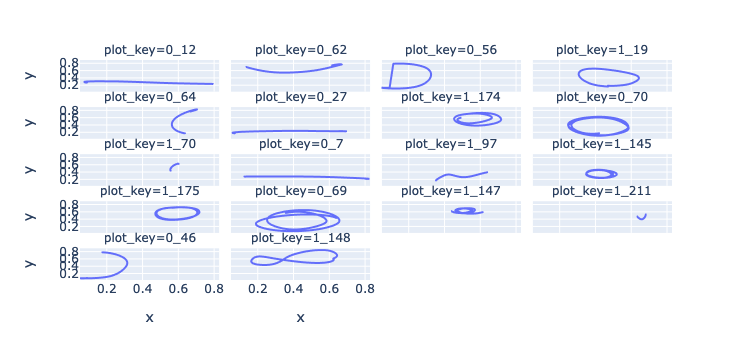

In [118]:
px.line(data_frame=res, x='x', y='y',
        facet_col='plot_key', facet_col_wrap=4)

In [119]:
for i, grp in res.groupby('plot_key'):
    print(i)

0_12
0_27
0_46
0_56
0_62
0_64
0_69
0_7
0_70
1_145
1_147
1_148
1_174
1_175
1_19
1_211
1_70
1_97


In [128]:
selected = {'points': [{'curveNumber': 0, 'pointNumber': 68, 'pointIndex': 68, 'x': 9.947559683701414, 'y': 16.244934210969763, 'customdata': ['0', 68]}, {'curveNumber': 1, 'pointNumber': 158, 'pointIndex': 158, 'x': 8.80025799858752, 'y': 14.363773815871575, 'customdata': ['1', 158]}, {'curveNumber': 1, 'pointNumber': 160, 'pointIndex': 160, 'x': 8.347910939928482, 'y': 14.498161040587354, 'customdata': ['1', 160]}, {'curveNumber': 1, 'pointNumber': 162, 'pointIndex': 162, 'x': 8.54865116355359, 'y': 14.889484069341137, 'customdata': ['1', 162]}, {'curveNumber': 1, 'pointNumber': 163, 'pointIndex': 163, 'x': 9.481355248331752, 'y': 14.801372320060423, 'customdata': ['1', 163]}, {'curveNumber': 1, 'pointNumber': 164, 'pointIndex': 164, 'x': 9.368337217032618, 'y': 15.298186212759505, 'customdata': ['1', 164]}, {'curveNumber': 1, 'pointNumber': 165, 'pointIndex': 165, 'x': 9.515162416631565, 'y': 14.362737894503915, 'customdata': ['1', 165]}, {'curveNumber': 1, 'pointNumber': 166, 'pointIndex': 166, 'x': 8.82023057658606, 'y': 15.177213680337612, 'customdata': ['1', 166]}, {'curveNumber': 1, 'pointNumber': 168, 'pointIndex': 168, 'x': 7.993106362325995, 'y': 15.410628499016294, 'customdata': ['1', 168]}], 'range': {'x': [7.954931572840816, 12.215433208995107], 'y': [14.253377617363371, 16.668477920922253]}}

In [130]:
np.array([p['customdata'] for p in selected['points']]).astype(int)

array([[  0,  68],
       [  1, 158],
       [  1, 160],
       [  1, 162],
       [  1, 163],
       [  1, 164],
       [  1, 165],
       [  1, 166],
       [  1, 168]])